# <font color='black'>Ensino Einstein</font>
## <font color='black'>Ciência de Dados e Informática para a Área da Saúde</font>
>### <font color='gray'>COVID-19 : Modelo preditivo e Storytelling</font>
>##### <font color='gray'>professor Rodrigo Signorini</font>

### Definição do Problema de Negócio

Com base em resultados de exames laboratoriais - *SARS-CoV-2 RT-PCR* e adicionais - coletados de pacientes atendidos no *Hospital Israelita Albert Einstein* de São Paulo, onde todos os dados foram anonimizados seguindo as melhores práticas e recomendações internacionais, desenvolver um modelo preditivo para prever o resultado do teste para *SARS-Cov-2 (COVID-19)*, se positivo ou negativo.

<font color='gray'>**IMPORTANTE**</font>

> Todos os dados clínicos foram padronizados para que tenham uma média zero e um desvio padrão unitário.

<font color='red'>**Entrega**</font>

*#1.* **_Notebook_**: Todo o processo de desenvolvimento deverá ser apresentado de forma bem estruturada, bem definida e muito bem embasada. Todo o percurso, desde a importação dos dados e suas respectivas análises e preparações para a devida entrega aos algoritmos de *Machine Learning* até a avaliação final do modelo escolhido, deve ser percorrido utilizando-se os conceitos, as técnicas e as ferramentas aprendidas em sala de aula.

*#2.* **_Storytelling_**: Diferentemente do embasamento estritamente técnico apresentado via *notebook*, deverá ser entregue um documento - em formato a escolher - elaborado de forma que os resultados obtidos possam ser comunicados eficientemente a qualquer tipo de público, técnico ou não. Para tanto, elementos como um excelente entendimento sobre o contexto, a escolha de uma apresentação visual adequada, sem excessos e com foco nos objetivos são a chave para que se possa contar uma boa história com os dados.

**_sugestão de link referente ao tema Storytelling_**
    
> http://www.storytellingwithdata.com/

**_sugestão de livro referente ao tema Storytelling_**

> <font color='blue'>**Storytelling com Dados**: Um guia sobre visualização de dados para profissionais de negócios</font>
>
> *Cole Nussbaumer Knaflic*

Trecho do livro sugerido acima:

_"...há uma distinção importante a fazer entre análise exploratória e explanatória. A análise exploratória é a que você faz para compreender os dados e descobrir o que pode ser digno de nota ou interessante a destacar para outras pessoas. Quando fazemos uma análise exploratória, é como procurar pérolas em ostras. Talvez precisemos abrir 100 ostras (testar 100 diferentes hipóteses ou examinar os dados de 100 diferentes maneiras) para encontrar, digamos, duas pérolas.
Quando estamos a ponto de comunicar nossa análise para nosso público, queremos estar no espaço explanatório, significando que você tem algo específico que deseja explicar, uma história específica que deseja contar — provavelmente sobre aquelas duas pérolas.
Com muita frequência, as pessoas se enganam e pensam que podem mostrar uma análise exploratória (simplesmente apresentar os dados, todas as 100 ostras), quando deveriam mostrar a explanatória (dedicar tempo para transformar os dados em informações que possam ser consumidas por um público: as duas pérolas). É um erro compreensível. Depois de se fazer toda uma análise, pode ser tentador mostrá-la inteira ao seu público, como evidência de todo o trabalho que você fez e da robusteza da análise. Resista a esse desejo. Você estaria fazendo seu público reabrir todas as ostras! Concentre-se nas pérolas, a informação que seu público precisa saber."_

##### Atualizações

##### Bibliotecas necessárias

In [ ]:
import pandas as pd
import os
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

##### Extraindo e Carregando os Dados

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
os.chdir('/content/drive/My Drive/Pós Graduação/Projeto - Análise Final - COVID-19/data/')

In [ ]:
ls

dataset.xlsx


In [ ]:
df_raw = pd.read_excel('dataset.xlsx')

In [ ]:
#pd.set_option('display.max_rows', 111)  # mostrar até 111 linhas para descrever todas as colunas

In [ ]:
df_raw.shape

(5644, 111)

In [ ]:
df_raw.head(10)

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Mycoplasma pneumoniae,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,...,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Sugar,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.022340,-0.517413,0.010677,0.102004,0.318366,-0.950790,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,not_detected,not_detected,not_detected,not_detected,not_detected,detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,-0.619086,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,75f16746216c4d1,9,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,

In [ ]:
df_raw.notnull().sum()

Patient ID                                               5644
Patient age quantile                                     5644
SARS-Cov-2 exam result                                   5644
Patient addmited to regular ward (1=yes, 0=no)           5644
Patient addmited to semi-intensive unit (1=yes, 0=no)    5644
                                                         ... 
HCO3 (arterial blood gas analysis)                         27
pO2 (arterial blood gas analysis)                          27
Arteiral Fio2                                              20
Phosphor                                                   20
ctO2 (arterial blood gas analysis)                         27
Length: 111, dtype: int64

In [ ]:
df_int = df_raw[df_raw['Lymphocytes'].notna()]

In [ ]:
df_int.shape

(602, 111)

In [ ]:
df_int.notnull().sum()

Patient ID                                               602
Patient age quantile                                     602
SARS-Cov-2 exam result                                   602
Patient addmited to regular ward (1=yes, 0=no)           602
Patient addmited to semi-intensive unit (1=yes, 0=no)    602
                                                        ... 
HCO3 (arterial blood gas analysis)                        27
pO2 (arterial blood gas analysis)                         27
Arteiral Fio2                                             20
Phosphor                                                  20
ctO2 (arterial blood gas analysis)                        27
Length: 111, dtype: int64

In [ ]:
df_int.describe(include='all')

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Mycoplasma pneumoniae,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,...,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Sugar,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
count,602,602.000000,602,602.000000,602.000000,602.000000,602.000000,602.000000,6.020000e+02,5.990000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.010000e+02,6.020000e+02,2.080000e+02,366,366,366,366,366,366,0.0,366,366,366,366,366,366,366,366,366,366,366,5.130000e+02,...,48,54,54,54,54,44,1,54.000000,53,46,0.0,54,54,54.000000,52,53,54,54,0.0,9.100000e+01,1.330000e+02,100.000000,0.0,3.000000e+00,103.000000,2.300000e+01,2.700000e+01,8.000000e+00,0.0,12.000000,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.000000e+01,2.000000e+01,2.700000e+01
unique,602,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,1,2,2,NaN,2,2,1,2,2,2,2,2,1,2,1,NaN,...,2,4,14,3,2,2,1,NaN,2,2,NaN,27,4,NaN,1,1,1,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,a9bc0dfbf1d504c,NaN,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,NaN,...,absent,clear,5.0,absent,absent,absent,not_done,NaN,normal,absent,NaN,<1000,Ausentes,NaN,absent,absent,absent,yellow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,519,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,356,362,341,366,354,268,NaN,361,363,366,365,365,363,364,345,366,361,366,NaN,...,47,48,10,39,53,43,1,NaN,52,45,NaN,8,50,NaN,52,53,54,42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,11.156146,NaN,0.096346,0.069767,0.048173,-0.001267,-0.000900,-3.535004e-10,7.438142e-09,8.424447e-09,-7.866736e-09,1.014863e-09,6.215833e-09,-6.633740e-09,-3.453010e-09,7.206147e-09,-4.155369e-09,-3.220114e-09,1.020433e-08,7.069992e-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.908361e-09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.023199,NaN,NaN,NaN,NaN,NaN,0.048213,NaN,NaN,NaN,NaN,NaN,-9.824941e-10,-4.733640e-09,-0.024625,NaN,-1.986821e-08,-0.00

In [ ]:
df_int = df_int[['Patient ID','Patient age quantile','SARS-Cov-2 exam result','Patient addmited to regular ward (1=yes, 0=no)','Patient addmited to semi-intensive unit (1=yes, 0=no)','Patient addmited to intensive care unit (1=yes, 0=no)','Hematocrit','Hemoglobin','Platelets','Red blood Cells','Lymphocytes','Leukocytes','Basophils','Eosinophils','Monocytes','Red blood cell distribution width (RDW)','Neutrophils','Proteina C reativa mg/dL','Urea','Creatinine']]

In [ ]:
df_int.notnull().sum()

Patient ID                                               602
Patient age quantile                                     602
SARS-Cov-2 exam result                                   602
Patient addmited to regular ward (1=yes, 0=no)           602
Patient addmited to semi-intensive unit (1=yes, 0=no)    602
Patient addmited to intensive care unit (1=yes, 0=no)    602
Hematocrit                                               602
Hemoglobin                                               602
Platelets                                                602
Red blood Cells                                          602
Lymphocytes                                              602
Leukocytes                                               602
Basophils                                                602
Eosinophils                                              602
Monocytes                                                601
Red blood cell distribution width (RDW)                  602
Neutrophils             

In [ ]:
df_int = df_int[df_int['Neutrophils'].notna()]

In [ ]:
df_int.notnull().sum()

Patient ID                                               513
Patient age quantile                                     513
SARS-Cov-2 exam result                                   513
Patient addmited to regular ward (1=yes, 0=no)           513
Patient addmited to semi-intensive unit (1=yes, 0=no)    513
Patient addmited to intensive care unit (1=yes, 0=no)    513
Hematocrit                                               513
Hemoglobin                                               513
Platelets                                                513
Red blood Cells                                          513
Lymphocytes                                              513
Leukocytes                                               513
Basophils                                                513
Eosinophils                                              513
Monocytes                                                513
Red blood cell distribution width (RDW)                  513
Neutrophils             

In [ ]:
df_int = df_int[df_int['Proteina C reativa mg/dL'].notna()]

In [ ]:
df_int.notnull().sum()

Patient ID                                               422
Patient age quantile                                     422
SARS-Cov-2 exam result                                   422
Patient addmited to regular ward (1=yes, 0=no)           422
Patient addmited to semi-intensive unit (1=yes, 0=no)    422
Patient addmited to intensive care unit (1=yes, 0=no)    422
Hematocrit                                               422
Hemoglobin                                               422
Platelets                                                422
Red blood Cells                                          422
Lymphocytes                                              422
Leukocytes                                               422
Basophils                                                422
Eosinophils                                              422
Monocytes                                                422
Red blood cell distribution width (RDW)                  422
Neutrophils             

In [ ]:
df_int = df_int[['Patient age quantile','SARS-Cov-2 exam result','Patient addmited to regular ward (1=yes, 0=no)','Patient addmited to semi-intensive unit (1=yes, 0=no)','Patient addmited to intensive care unit (1=yes, 0=no)','Hematocrit','Hemoglobin','Platelets','Red blood Cells','Lymphocytes','Leukocytes','Basophils','Eosinophils','Monocytes','Red blood cell distribution width (RDW)','Neutrophils','Proteina C reativa mg/dL']]

In [ ]:
df_int.notnull().sum()

Patient age quantile                                     422
SARS-Cov-2 exam result                                   422
Patient addmited to regular ward (1=yes, 0=no)           422
Patient addmited to semi-intensive unit (1=yes, 0=no)    422
Patient addmited to intensive care unit (1=yes, 0=no)    422
Hematocrit                                               422
Hemoglobin                                               422
Platelets                                                422
Red blood Cells                                          422
Lymphocytes                                              422
Leukocytes                                               422
Basophils                                                422
Eosinophils                                              422
Monocytes                                                422
Red blood cell distribution width (RDW)                  422
Neutrophils                                              422
Proteina C reativa mg/dL

In [ ]:
df_int

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Red blood Cells,Lymphocytes,Leukocytes,Basophils,Eosinophils,Monocytes,Red blood cell distribution width (RDW),Neutrophils,Proteina C reativa mg/dL
1,17,negative,0,0,0,0.236515,-0.022340,-0.517413,0.102004,0.318366,-0.094610,-0.223767,1.482158,0.357547,-0.625073,-0.619086,-0.147895
8,1,negative,0,1,0,-1.571682,-0.774212,1.429667,-0.850035,-0.005738,0.364550,-0.223767,1.018625,0.068652,-0.978899,-0.127395,-0.286986
18,11,negative,0,0,0,0.991838,0.792188,0.072992,0.542763,0.045436,-0.211488,-0.834685,-0.709090,-0.220244,0.171035,0.265957,-0.487674
28,13,negative,0,0,0,1.014726,0.854844,-0.178244,0.489872,-0.730707,-0.075131,2.525365,0.217977,0.068652,0.171035,0.651115,-0.434025
29,14,negative,0,0,0,0.740064,0.854844,0.361914,0.436981,-0.227493,0.105751,-0.529226,-0.371974,0.121178,-0.713529,0.347905,-0.529401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5602,19,negative,0,0,0,0.190738,0.165628,-0.102873,0.384090,-1.583611,-0.328365,-0.834685,0.892207,1.066653,0.347948,1.118221,3.627427
5614,19,negative,0,0,0,-0.289922,-0.523588,0.663397,0.754327,-1.532437,1.569499,0.081693,-0.540532,1.670707,0.967144,1.134611,5.733660
5615,15,negative,0,0,0,0.717175,1.105468,-0.492289,0.613284,0.002791,-0.550988,-0.223767,-0.709090,0.909074,-1.155812,-0.061837,0.561468
5618,17,negative,0,0,0,-3.242548,-2.779203,-1.773594,-3.318285,-1.830953,-1.733675,-1.140144,-0.582671,1.381812,-0.448160,1.552548,0.609157


In [ ]:
df_int = df_int.rename(columns={"Patient addmited to regular ward (1=yes, 0=no)": "CMC", "Patient addmited to semi-intensive unit (1=yes, 0=no)": "Semi", "Patient addmited to intensive care unit (1=yes, 0=no)":"Intensiva", "Red blood cell distribution width (RDW)":"RDW"})

In [ ]:
df_int.groupby(['SARS-Cov-2 exam result']).size()

SARS-Cov-2 exam result
negative    361
positive     61
dtype: int64

In [ ]:
 def convert(row):
  if 'negative' in str(row['SARS-Cov-2 exam result']):
   return True
  else:
   return False

 df_int.loc[df_int.apply(convert, axis=1) == True, 'Convertido'] = 0
 df_int.loc[df_int.apply(convert, axis=1) == False, 'Convertido'] = 1

In [ ]:
df_int

,Patient age quantile,SARS-Cov-2 exam result,CMC,Semi,Intensiva,Hematocrit,Hemoglobin,Platelets,Red blood Cells,Lymphocytes,Leukocytes,Basophils,Eosinophils,Monocytes,RDW,Neutrophils,Proteina C reativa mg/dL,Convertido
1,17,negative,0,0,0,0.236515,-0.022340,-0.517413,0.102004,0.318366,-0.094610,-0.223767,1.482158,0.357547,-0.625073,-0.619086,-0.147895,0.0
8,1,negative,0,1,0,-1.571682,-0.774212,1.429667,-0.850035,-0.005738,0.364550,-0.223767,1.018625,0.068652,-0.978899,-0.127395,-0.286986,0.0
18,11,negative,0,0,0,0.991838,0.792188,0.072992,0.542763,0.045436,-0.211488,-0.834685,-0.709090,-0.220244,0.171035,0.265957,-0.487674,0.0
28,13,negative,0,0,0,1.014726,0.854844,-0.178244,0.489872,-0.730707,-0.075131,2.525365,0.217977,0.068652,0.171035,0.651115,-0.434025,0.0
29,14,negative,0,0,0,0.740064,0.854844,0.361914,0.436981,-0.227493,0.105751,-0.529226,-0.371974,0.121178,-0.713529,0.347905,-0.529401,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5602,19,negative,0,0,0,0.190738,0.165628,-0.102873,0.384090,-1.583611,-0.328365,-0.834685,0.892207,1.066653,0.347948,1.118221,3.627427,0.0
5614,19,negative,0,0,0,-0.289922,-0.523588,0.663397,0.754327,-1.532437,1.569499,0.081693,-0.540532,1.670707,0.967144,1.134611,5.733660,0.0
5615,15,negative,0,0,0,0.717175,1.105468,-0.492289,0.613284,0.002791,-0.550988,-0.223767,-0.709090,0.909074,-1.155812,-0.061837,0.561468,0.0
5618,17,negative,0,0,0,-3.242548,-2.779203,-1.773594,-3.318285,-1.830953,-1.733675,-1.140144,-0.582671,1.381812,-0.448160,1.552548,0.609157,0.0


In [ ]:
df_int = df_int[['Patient age quantile','Hematocrit','Hemoglobin','Platelets','Red blood Cells','Lymphocytes','Leukocytes','Basophils','Eosinophils','Monocytes','RDW','Neutrophils','Proteina C reativa mg/dL','Convertido']]

In [ ]:
df_int

,Patient age quantile,Hematocrit,Hemoglobin,Platelets,Red blood Cells,Lymphocytes,Leukocytes,Basophils,Eosinophils,Monocytes,RDW,Neutrophils,Proteina C reativa mg/dL,Convertido
1,17,0.236515,-0.022340,-0.517413,0.102004,0.318366,-0.094610,-0.223767,1.482158,0.357547,-0.625073,-0.619086,-0.147895,0.0
8,1,-1.571682,-0.774212,1.429667,-0.850035,-0.005738,0.364550,-0.223767,1.018625,0.068652,-0.978899,-0.127395,-0.286986,0.0
18,11,0.991838,0.792188,0.072992,0.542763,0.045436,-0.211488,-0.834685,-0.709090,-0.220244,0.171035,0.265957,-0.487674,0.0
28,13,1.014726,0.854844,-0.178244,0.489872,-0.730707,-0.075131,2.525365,0.217977,0.068652,0.171035,0.651115,-0.434025,0.0
29,14,0.740064,0.854844,0.361914,0.436981,-0.227493,0.105751,-0.529226,-0.371974,0.121178,-0.713529,0.347905,-0.529401,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5602,19,0.190738,0.165628,-0.102873,0.384090,-1.583611,-0.328365,-0.834685,0.892207,1.066653,0.347948,1.118221,3.627427,0.0
5614,19,-0.289922,-0.523588,0.663397,0.754327,-1.532437,1.569499,0.081693,-0.540532,1.670707,0.967144,1.134611,5.733660,0.0
5615,15,0.717175,1.105468,-0.492289,0.613284,0.002791,-0.550988,-0.223767,-0.709090,0.909074,-1.155812,-0.061837,0.561468,0.0
5618,17,-3.242548,-2.779203,-1.773594,-3.318285,-1.830953,-1.733675,-1.140144,-0.582671,1.381812,-0.448160,1.552548,0.609157,0.0


In [ ]:
# Correlação de Pearson
df_int.corr(method = 'pearson')

,Patient age quantile,Hematocrit,Hemoglobin,Platelets,Red blood Cells,Lymphocytes,Leukocytes,Basophils,Eosinophils,Monocytes,RDW,Neutrophils,Proteina C reativa mg/dL,Convertido
Patient age quantile,1.000000,0.056497,0.018686,-0.152025,-0.028310,-0.090174,-0.079476,0.035624,-0.031726,0.057412,0.219597,0.060613,0.192294,0.167792
Hematocrit,0.056497,1.000000,0.964398,-0.068339,0.881732,0.023264,0.003708,0.107178,-0.033796,0.067374,-0.190057,-0.038241,-0.156922,0.083483
Hemoglobin,0.018686,0.964398,1.000000,-0.106598,0.852423,0.027369,-0.019770,0.097141,-0.045156,0.077263,-0.273540,-0.043084,-0.147348,0.094598
Platelets,-0.152025,-0.068339,-0.106598,1.000000,-0.084928,0.087428,0.417490,0.160560,0.217624,-0.217529,0.023292,-0.055451,-0.031149,-0.312810
Red blood Cells,-0.028310,0.881732,0.852423,-0.084928,1.000000,0.005804,0.006258,0.073434,-0.054230,0.076339,-0.069252,-0.020923,-0.083524,0.133971
Lymphocytes,-0.090174,0.023264,0.027369,0.087428,0.005804,1.000000,-0.365773,0.358046,0.241140,0.042698,-0.090638,-0.936324,-0.365865,0.031496
Leukocytes,-0.079476,0.003708,-0.019770,0.417490,0.006258,-0.365773,1.000000,-0.228862,-0.068515,-0.315931,0.049717,0.427583,0.218905,-0.369342
Basophils,0.035624,0.107178,0.097141,0.160560,0.073434,0.358046,-0.228862,1.000000,0.349736,-0.011113,0.012865,-0.400869,-0.211788,-0.123352
Eosinophils,-0.031726,-0.033796,-0.045156,0.217624,-0.054230,0.241140,-0.068515,0.349736,1.000000,-0.044952,0.050412,-0.403953,-0.169023,-0.215938
Monocytes,0.057412,0.067374,0.077263,-0.217529,0.076339,0.042698,-0.315931,-0.011113,-0.044952,1.000000,0.041213,-0.316666,0.103727,0.239522


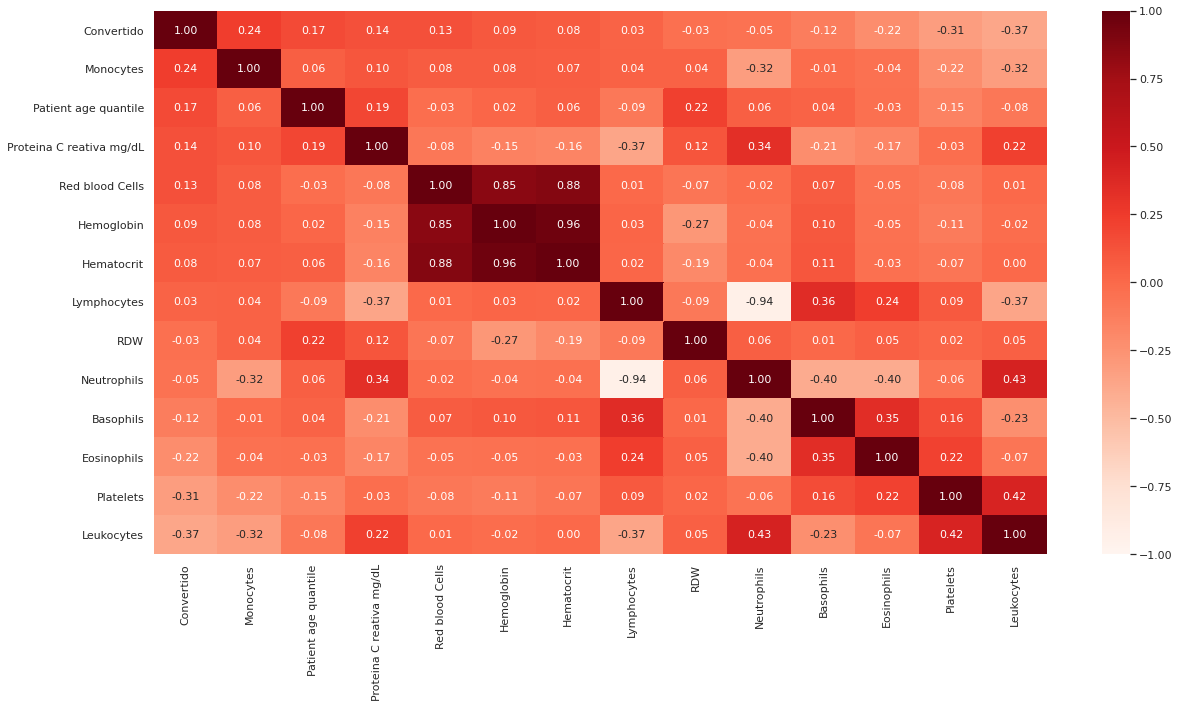

In [ ]:
correlations = df_int.corr()
k = 33
cols = correlations.nlargest(k, "Convertido")["Convertido"].index
cm = np.corrcoef(df_int[cols].values.T)
sns.set(font_scale = 1)
fig, ax = plt.subplots(figsize = (20, 10))
ax = sns.heatmap(cm, vmin = -1, vmax = 1, cmap = "Reds", cbar = True, annot = True, square = False, 
                 fmt = ".2f", annot_kws = {"size": 11}, yticklabels = cols.values, xticklabels = cols.values)
plt.show()

In [ ]:
df_int.columns = [j.strip().replace(' ', '_').replace('-', '_').lower() for j in df_int.columns]

In [ ]:
df_int.columns = [j.replace('\xa0', '_') for j in df_int.columns]

In [ ]:
df_int.shape

(422, 14)

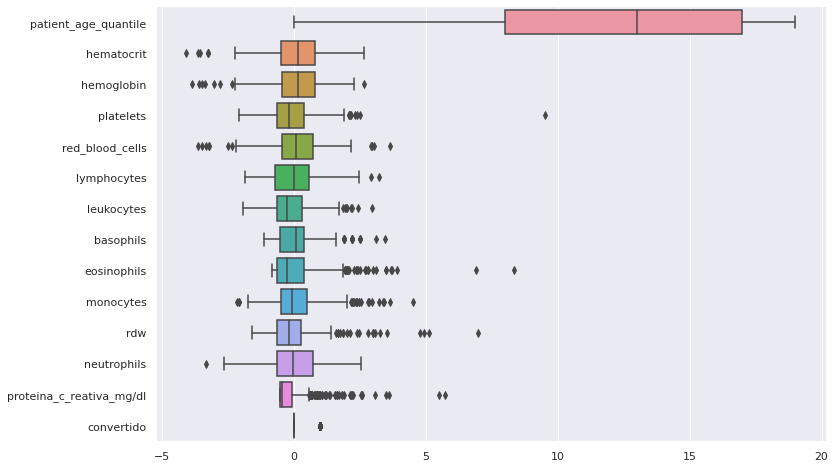

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot (Seaborn)
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (12, 8))
sns.boxplot(data = df_int, orient = "h")

In [ ]:
# Scaling (entre 0 e 1)
from sklearn.preprocessing import MinMaxScaler

array = df_int.values

# features [X] e label [y]
X = array[:, 0:13]
y = array[:, 13]

# Transformando os dados
transformer = MinMaxScaler(feature_range = (0, 1))
X_rescaled = transformer.fit_transform(X)

# Sumarizando os dados transformados
print("Dados originais:\n\n", X)
print("\nDados transformados:\n\n", X_rescaled)

Dados originais:

 [[17.          0.23651545 -0.02234027 ... -0.62507266 -0.61908603
  -0.14789495]
 [ 1.         -1.57168221 -0.774212   ... -0.97889912 -0.12739536
  -0.28698575]
 [11.          0.99183822  0.79218763 ...  0.1710353   0.26595679
  -0.48767394]
 ...
 [15.          0.71717513  1.10546756 ... -1.15581191 -0.06183667
   0.5614683 ]
 [17.         -3.24254799 -2.77920341 ... -0.44815987  1.55254781
   0.60915661]
 [19.          0.69428688  0.54156393 ... -0.18279028  0.38068476
  -0.50357002]]

Dados transformados:

 [[0.89473684 0.63945583 0.58653838 ... 0.11340211 0.46304046 0.06180666]
 [0.05263158 0.37074828 0.47115378 ... 0.07216493 0.54672246 0.03961966]
 [0.57894737 0.75170071 0.71153838 ... 0.20618558 0.613668   0.00760698]
 ...
 [0.78947368 0.71088435 0.7596153  ... 0.0515464  0.55788005 0.17496039]
 [0.89473684 0.12244896 0.16346152 ... 0.13402065 0.83263598 0.18256737]
 [1.         0.70748304 0.67307688 ... 0.1649485  0.63319383 0.00507132]]


In [ ]:
print(X)

[[17.          0.23651545 -0.02234027 ... -0.62507266 -0.61908603
  -0.14789495]
 [ 1.         -1.57168221 -0.774212   ... -0.97889912 -0.12739536
  -0.28698575]
 [11.          0.99183822  0.79218763 ...  0.1710353   0.26595679
  -0.48767394]
 ...
 [15.          0.71717513  1.10546756 ... -1.15581191 -0.06183667
   0.5614683 ]
 [17.         -3.24254799 -2.77920341 ... -0.44815987  1.55254781
   0.60915661]
 [19.          0.69428688  0.54156393 ... -0.18279028  0.38068476
  -0.50357002]]


In [ ]:
# Reconstruindo o DataFrame
df_int = pd.DataFrame()

df_int = pd.DataFrame({'patient_age_quantile': X_rescaled[:, 0], 
                        'proteina_c_reativa_mg/dl': X_rescaled[:, 1], 
                        'hematocrit': X_rescaled[:, 2], 
                        'hemoglobin': X_rescaled[:, 3], 
                        'platelets': X_rescaled[:, 4], 
                        'red_blood_cells': X_rescaled[:, 5],
                        'lymphocytes': X_rescaled[:, 6],
                        'leukocytes': X_rescaled[:, 7],
                        'basophils': X_rescaled[:, 8],
                        'eosinophils': X_rescaled[:, 9],
                        'monocytes': X_rescaled[:, 10],
                        'rdw': X_rescaled[:, 11],
                        'neutrophils':X_rescaled[:, 12],
                        'convertido': y})
df_int.head(10)

,patient_age_quantile,proteina_c_reativa_mg/dl,hematocrit,hemoglobin,platelets,red_blood_cells,lymphocytes,leukocytes,basophils,eosinophils,monocytes,rdw,neutrophils,convertido
0,0.894737,0.639456,0.586538,0.134199,0.513317,0.425676,0.375927,0.200000,0.252294,0.376471,0.113402,0.463040,0.061807,0.0
1,0.052632,0.370748,0.471154,0.301948,0.382567,0.361486,0.470051,0.200000,0.201835,0.333333,0.072165,0.546722,0.039620,0.0
2,0.578947,0.751701,0.711538,0.185065,0.573850,0.371622,0.351968,0.066667,0.013761,0.290196,0.206186,0.613668,0.007607,0.0
3,0.684211,0.755102,0.721154,0.163420,0.566586,0.217905,0.379920,0.800000,0.114679,0.333333,0.206186,0.679219,0.016165,0.0
4,0.736842,0.714286,0.721154,0.209957,0.559322,0.317568,0.416999,0.133333,0.050459,0.341176,0.103093,0.627615,0.000951,0.0
5,0.473684,0.503401,0.480769,0.260823,0.455206,0.189189,0.336566,0.200000,0.032110,0.443137,0.082474,0.701534,0.172425,0.0
6,0.894737,0.724490,0.750000,0.154762,0.595642,0.310811,0.395322,0.333333,0.096330,0.247059,0.175258,0.648536,0.027892,0.0
7,0.736842,0.588435,0.538461,0.301948,0.416465,0.427365,0.544210,0.266667,0.032110,0.333333,0.237113,0.542538,0.002536,0.0
8,0.842105,0.816327,0.778846,0.230519,0.673123,0.462838,0.390759,0.400000,0.050459,0.247059,0.195876,0.535565,0.019334,0.0
9,0.789474,0.710884,0.682692,0.213203,0.554479,0.364865,0.358813,0.333333,0.073395,0.411765,0.185567,0.552301,0.028843,0.0


In [ ]:
df_int.columns

Index(['patient_age_quantile', 'proteina_c_reativa_mg/dl', 'hematocrit',
       'hemoglobin', 'platelets', 'red_blood_cells', 'lymphocytes',
       'leukocytes', 'basophils', 'eosinophils', 'monocytes', 'rdw',
       'neutrophils', 'convertido'],
      dtype='object')

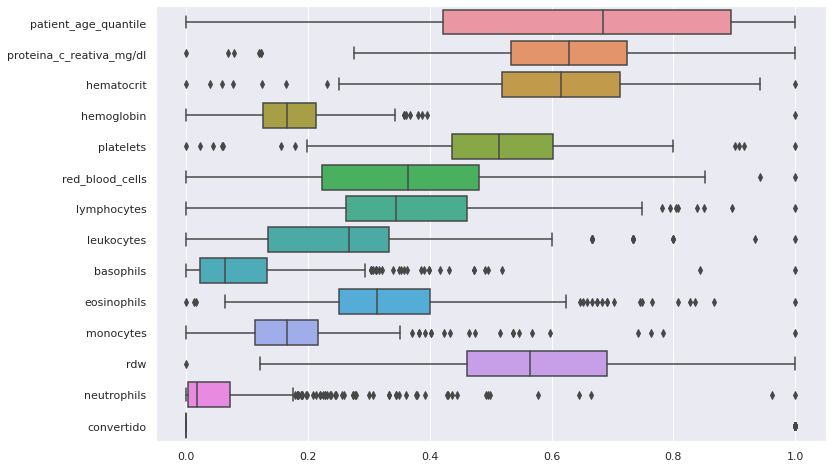

In [ ]:
# Boxplot (Seaborn)
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (12, 8))
sns.boxplot(data = df_int, orient = "h")

In [ ]:
df_int.dtypes

patient_age_quantile        float64
proteina_c_reativa_mg/dl    float64
hematocrit                  float64
hemoglobin                  float64
platelets                   float64
red_blood_cells             float64
lymphocytes                 float64
leukocytes                  float64
basophils                   float64
eosinophils                 float64
monocytes                   float64
rdw                         float64
neutrophils                 float64
convertido                  float64
dtype: object

In [ ]:
df_int = df_int[['patient_age_quantile', 'proteina_c_reativa_mg/dl',
       'hemoglobin', 'platelets', 'red_blood_cells', 'lymphocytes',
       'leukocytes', 'basophils', 'eosinophils', 'monocytes', 'rdw',
       'neutrophils', 'convertido']]

In [ ]:
#Definindo as features [X], o label [y] e o valor de seed para controlar a aleatoriedade

# features [X] e label [y]

array = df_int.values

X = array[:, 0:12]
y = array[:, 12]

In [ ]:
# Tratamento da aleatoriedade para garantir que os mesmos dados sejam sempre reproduzidos da mesma maneira
# Importante para garantir a justa comparação de performance entre os algoritmos de Machine Learning
seed = 1234

In [ ]:
df_int

,patient_age_quantile,proteina_c_reativa_mg/dl,hemoglobin,platelets,red_blood_cells,lymphocytes,leukocytes,basophils,eosinophils,monocytes,rdw,neutrophils,convertido
0,0.894737,0.639456,0.134199,0.513317,0.425676,0.375927,0.200000,0.252294,0.376471,0.113402,0.463040,0.061807,0.0
1,0.052632,0.370748,0.301948,0.382567,0.361486,0.470051,0.200000,0.201835,0.333333,0.072165,0.546722,0.039620,0.0
2,0.578947,0.751701,0.185065,0.573850,0.371622,0.351968,0.066667,0.013761,0.290196,0.206186,0.613668,0.007607,0.0
3,0.684211,0.755102,0.163420,0.566586,0.217905,0.379920,0.800000,0.114679,0.333333,0.206186,0.679219,0.016165,0.0
4,0.736842,0.714286,0.209957,0.559322,0.317568,0.416999,0.133333,0.050459,0.341176,0.103093,0.627615,0.000951,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,1.000000,0.632653,0.169913,0.552058,0.048986,0.328009,0.066667,0.188073,0.482353,0.226804,0.758717,0.664025,0.0
418,1.000000,0.561225,0.235931,0.602906,0.059122,0.717056,0.266667,0.032110,0.572549,0.298969,0.761506,1.000000,0.0
419,0.789474,0.710884,0.136364,0.583535,0.363176,0.282373,0.200000,0.013761,0.458824,0.051546,0.557880,0.174960,0.0
420,0.894737,0.122449,0.025974,0.043584,0.000000,0.039932,0.000000,0.027523,0.529412,0.134021,0.832636,0.182567,0.0


In [ ]:
# Calculando VIF

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
vif["features"] = df_int.columns[0:12]

vif.round(1)

,VIF Factor,features
0,7.6,patient_age_quantile
1,110.4,proteina_c_reativa_mg/dl
2,8.0,hemoglobin
3,78.1,platelets
4,8.0,red_blood_cells
5,11.3,lymphocytes
6,4.8,leukocytes
7,2.2,basophils
8,6.8,eosinophils
9,4.4,monocytes


ranking das features:

1. feature 5 - lymphocytes (0.172660)
2. feature 2 - hemoglobin (0.120004)
3. feature 11 - neutrophils (0.094413)
4. feature 8 - eosinophils (0.085523)
5. feature 7 - basophils (0.085151)
6. feature 0 - patient_age_quantile (0.077170)
7. feature 3 - platelets (0.065179)
8. feature 1 - proteina_c_reativa_mg/dl (0.063547)
9. feature 4 - red_blood_cells (0.061874)
10. feature 9 - monocytes (0.060679)
11. feature 6 - leukocytes (0.059007)
12. feature 10 - rdw (0.054792)


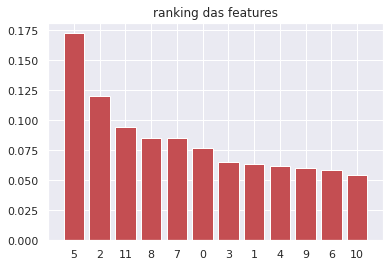

In [ ]:
# ExtraTreesClassifier

# Import dos Módulos
from sklearn.ensemble import ExtraTreesClassifier

# Criação do Modelo - Feature Selection
modelo = ExtraTreesClassifier(random_state=seed)
modelo.fit(X, y)

# Imprimindo os resultados
importances = modelo.feature_importances_
indices = np.argsort(importances)[::-1]

print("ranking das features:")
print()
for f in range(X.shape[1]):
    print("%d. feature %d - %s (%f)" % (f + 1, indices[f], df_int.columns[indices[f]], importances[indices[f]]))

plt.figure()
plt.title("ranking das features")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


+ ------------------ +
| LogisticRegression |

Métricas de Avaliação : Média de cada resultado obtido em cada iteração do Cross Validation
> accuracy            : 0.8602 (+/- 1std 0.0365)
> precision           : 0.5000 (+/- 1std 0.4472)
> recall              : 0.0586 (+/- 1std 0.0503)
> f1                  : 0.1044 (+/- 1std 0.0899)
> balanced_accuracy   : 0.5279 (+/- 1std 0.0248)
> roc-auc             : 0.5279 (+/- 1std 0.0248)

Matriz de Confusão    : Soma de cada resultado obtido em cada iteração do Cross Validate
> TN                  : 360.0000
> FP                  : 1.0000
> FN                  : 58.0000
> TP                  : 3.0000


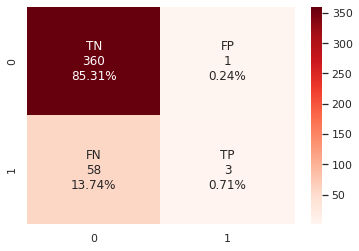

Métricas de Avaliação : A partir da Matriz de Confusão com a soma de cada resultado obtido em cada iteração do Cross Validate
> accuracy            : 0.8602
> precision           : 0.7500
> recall              : 0.0492
> f1                  : 0.0923
> sensibility         : 0.0492
> specificity         : 0.9972
> balanced_accuracy   : 0.5232

+ -------------------------- +
| LinearDiscriminantAnalysis |

Métricas de Avaliação : Média de cada resultado obtido em cada iteração do Cross Validation
> accuracy            : 0.8696 (+/- 1std 0.0188)
> precision           : 0.5806 (+/- 1std 0.1050)
> recall              : 0.3613 (+/- 1std 0.0945)
> f1                  : 0.4342 (+/- 1std 0.0771)
> balanced_accuracy   : 0.6586 (+/- 1std 0.0427)
> roc-auc             : 0.6586 (+/- 1std 0.0427)

Matriz de Confusão    : Soma de cada resultado obtido em cada iteração do Cross Validate
> TN                  : 345.0000
> FP                  : 16.0000
> FN                  : 39.0000
> TP                

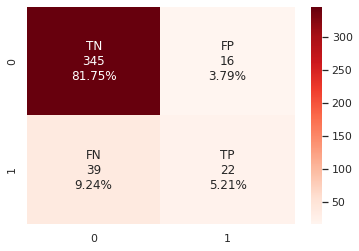

Métricas de Avaliação : A partir da Matriz de Confusão com a soma de cada resultado obtido em cada iteração do Cross Validate
> accuracy            : 0.8697
> precision           : 0.5789
> recall              : 0.3607
> f1                  : 0.4444
> sensibility         : 0.3607
> specificity         : 0.9557
> balanced_accuracy   : 0.6582

+ --- +
| SVC |

Métricas de Avaliação : Média de cada resultado obtido em cada iteração do Cross Validation
> accuracy            : 0.8721 (+/- 1std 0.0294)
> precision           : 0.8100 (+/- 1std 0.1855)
> recall              : 0.1740 (+/- 1std 0.1199)
> f1                  : 0.2641 (+/- 1std 0.1489)
> balanced_accuracy   : 0.5828 (+/- 1std 0.0578)
> roc-auc             : 0.5828 (+/- 1std 0.0578)

Matriz de Confusão    : Soma de cada resultado obtido em cada iteração do Cross Validate
> TN                  : 358.0000
> FP                  : 3.0000
> FN                  : 51.0000
> TP                  : 10.0000


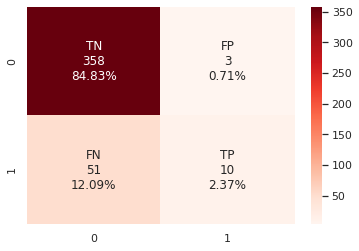

Métricas de Avaliação : A partir da Matriz de Confusão com a soma de cada resultado obtido em cada iteração do Cross Validate
> accuracy            : 0.8720
> precision           : 0.7692
> recall              : 0.1639
> f1                  : 0.2703
> sensibility         : 0.1639
> specificity         : 0.9917
> balanced_accuracy   : 0.5778

+ ------------- +
| SGDClassifier |

Métricas de Avaliação : Média de cada resultado obtido em cada iteração do Cross Validation
> accuracy            : 0.8415 (+/- 1std 0.0514)
> precision           : 0.5526 (+/- 1std 0.1426)
> recall              : 0.6366 (+/- 1std 0.2962)
> f1                  : 0.5104 (+/- 1std 0.1068)
> balanced_accuracy   : 0.7593 (+/- 1std 0.1025)
> roc-auc             : 0.7593 (+/- 1std 0.1025)

Matriz de Confusão    : Soma de cada resultado obtido em cada iteração do Cross Validate
> TN                  : 318.0000
> FP                  : 43.0000
> FN                  : 24.0000
> TP                  : 37.0000


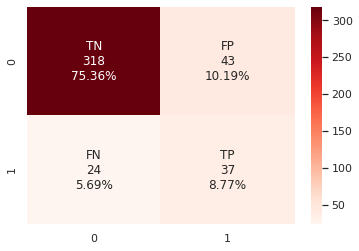

Métricas de Avaliação : A partir da Matriz de Confusão com a soma de cada resultado obtido em cada iteração do Cross Validate
> accuracy            : 0.8412
> precision           : 0.4625
> recall              : 0.6066
> f1                  : 0.5248
> sensibility         : 0.6066
> specificity         : 0.8809
> balanced_accuracy   : 0.7437

+ -------------------- +
| KNeighborsClassifier |

Métricas de Avaliação : Média de cada resultado obtido em cada iteração do Cross Validation
> accuracy            : 0.8792 (+/- 1std 0.0137)
> precision           : 0.6393 (+/- 1std 0.1357)
> recall              : 0.3220 (+/- 1std 0.1156)
> f1                  : 0.4161 (+/- 1std 0.1347)
> balanced_accuracy   : 0.6472 (+/- 1std 0.0545)
> roc-auc             : 0.6472 (+/- 1std 0.0545)

Matriz de Confusão    : Soma de cada resultado obtido em cada iteração do Cross Validate
> TN                  : 351.0000
> FP                  : 10.0000
> FN                  : 41.0000
> TP                  : 20.0000


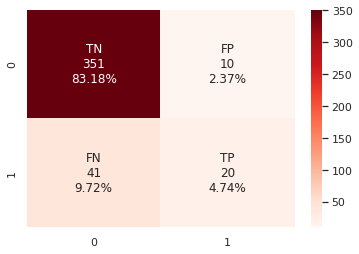

Métricas de Avaliação : A partir da Matriz de Confusão com a soma de cada resultado obtido em cada iteração do Cross Validate
> accuracy            : 0.8791
> precision           : 0.6667
> recall              : 0.3279
> f1                  : 0.4396
> sensibility         : 0.3279
> specificity         : 0.9723
> balanced_accuracy   : 0.6501

+ ---------- +
| GaussianNB |

Métricas de Avaliação : Média de cada resultado obtido em cada iteração do Cross Validation
> accuracy            : 0.8601 (+/- 1std 0.0430)
> precision           : 0.5188 (+/- 1std 0.1193)
> recall              : 0.6975 (+/- 1std 0.0837)
> f1                  : 0.5892 (+/- 1std 0.0974)
> balanced_accuracy   : 0.7932 (+/- 1std 0.0558)
> roc-auc             : 0.7932 (+/- 1std 0.0558)

Matriz de Confusão    : Soma de cada resultado obtido em cada iteração do Cross Validate
> TN                  : 321.0000
> FP                  : 40.0000
> FN                  : 19.0000
> TP                  : 42.0000


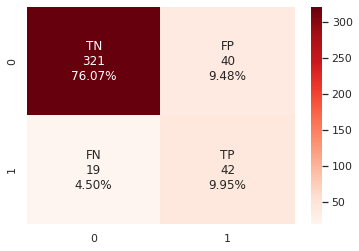

Métricas de Avaliação : A partir da Matriz de Confusão com a soma de cada resultado obtido em cada iteração do Cross Validate
> accuracy            : 0.8602
> precision           : 0.5122
> recall              : 0.6885
> f1                  : 0.5874
> sensibility         : 0.6885
> specificity         : 0.8892
> balanced_accuracy   : 0.7889

+ ---------------------- +
| DecisionTreeClassifier |

Métricas de Avaliação : Média de cada resultado obtido em cada iteração do Cross Validation
> accuracy            : 0.8459 (+/- 1std 0.0264)
> precision           : 0.4724 (+/- 1std 0.0603)
> recall              : 0.5062 (+/- 1std 0.0698)
> f1                  : 0.4823 (+/- 1std 0.0277)
> balanced_accuracy   : 0.7060 (+/- 1std 0.0363)
> roc-auc             : 0.7060 (+/- 1std 0.0363)

Matriz de Confusão    : Soma de cada resultado obtido em cada iteração do Cross Validate
> TN                  : 327.0000
> FP                  : 34.0000
> FN                  : 31.0000
> TP                  : 30.0

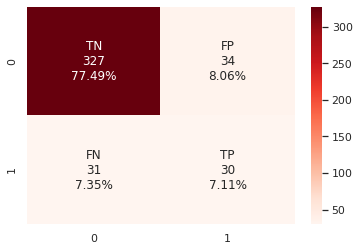

Métricas de Avaliação : A partir da Matriz de Confusão com a soma de cada resultado obtido em cada iteração do Cross Validate
> accuracy            : 0.8460
> precision           : 0.4688
> recall              : 0.4918
> f1                  : 0.4800
> sensibility         : 0.4918
> specificity         : 0.9058
> balanced_accuracy   : 0.6988

+ ---------------------- +
| RandomForestClassifier |

Métricas de Avaliação : Média de cada resultado obtido em cada iteração do Cross Validation
> accuracy            : 0.8861 (+/- 1std 0.0360)
> precision           : 0.7424 (+/- 1std 0.2173)
> recall              : 0.3516 (+/- 1std 0.1100)
> f1                  : 0.4647 (+/- 1std 0.1274)
> balanced_accuracy   : 0.6631 (+/- 1std 0.0572)
> roc-auc             : 0.6631 (+/- 1std 0.0572)

Matriz de Confusão    : Soma de cada resultado obtido em cada iteração do Cross Validate
> TN                  : 352.0000
> FP                  : 9.0000
> FN                  : 39.0000
> TP                  : 22.00

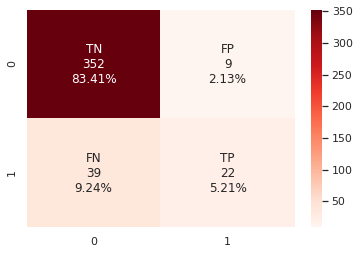

Métricas de Avaliação : A partir da Matriz de Confusão com a soma de cada resultado obtido em cada iteração do Cross Validate
> accuracy            : 0.8863
> precision           : 0.7097
> recall              : 0.3607
> f1                  : 0.4783
> sensibility         : 0.3607
> specificity         : 0.9751
> balanced_accuracy   : 0.6679

+ ------------------ +
| AdaBoostClassifier |

Métricas de Avaliação : Média de cada resultado obtido em cada iteração do Cross Validation
> accuracy            : 0.8720 (+/- 1std 0.0356)
> precision           : 0.5955 (+/- 1std 0.1576)
> recall              : 0.4755 (+/- 1std 0.0527)
> f1                  : 0.5199 (+/- 1std 0.0703)
> balanced_accuracy   : 0.7072 (+/- 1std 0.0322)
> roc-auc             : 0.7072 (+/- 1std 0.0322)

Matriz de Confusão    : Soma de cada resultado obtido em cada iteração do Cross Validate
> TN                  : 339.0000
> FP                  : 22.0000
> FN                  : 32.0000
> TP                  : 29.0000


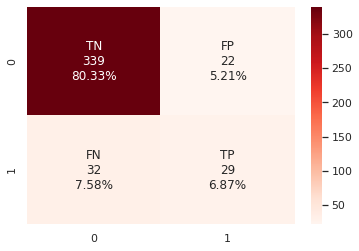

Métricas de Avaliação : A partir da Matriz de Confusão com a soma de cada resultado obtido em cada iteração do Cross Validate
> accuracy            : 0.8720
> precision           : 0.5686
> recall              : 0.4754
> f1                  : 0.5179
> sensibility         : 0.4754
> specificity         : 0.9391
> balanced_accuracy   : 0.7072



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


+ ------------- +
| MLPClassifier |

Métricas de Avaliação : Média de cada resultado obtido em cada iteração do Cross Validation
> accuracy            : 0.9027 (+/- 1std 0.0267)
> precision           : 0.7070 (+/- 1std 0.1336)
> recall              : 0.5496 (+/- 1std 0.0802)
> f1                  : 0.6149 (+/- 1std 0.0954)
> balanced_accuracy   : 0.7553 (+/- 1std 0.0445)
> roc-auc             : 0.7553 (+/- 1std 0.0445)

Matriz de Confusão    : Soma de cada resultado obtido em cada iteração do Cross Validate
> TN                  : 347.0000
> FP                  : 14.0000
> FN                  : 27.0000
> TP                  : 34.0000


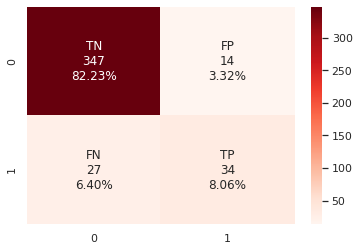

Métricas de Avaliação : A partir da Matriz de Confusão com a soma de cada resultado obtido em cada iteração do Cross Validate
> accuracy            : 0.9028
> precision           : 0.7083
> recall              : 0.5574
> f1                  : 0.6239
> sensibility         : 0.5574
> specificity         : 0.9612
> balanced_accuracy   : 0.7593



In [ ]:
# Cross Validation

# Import dos módulos
from sklearn.model_selection import KFold

# Definindo os valores para o número de folds
num_folds = 5

# Separando os dados em folds
kfold = KFold(n_splits = num_folds, shuffle = True, random_state = seed)

# Import dos módulos

from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import make_scorer

# Definindo e Construindo os Scores
def tn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 0]
def fp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 1]
def fn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 0]
def tp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 1]
def accuracy(y_true, y_pred): return accuracy_score(y_true, y_pred)
def precision(y_true, y_pred): return precision_score(y_true, y_pred)
def recall(y_true, y_pred): return recall_score(y_true, y_pred)
def f1(y_true, y_pred): return f1_score(y_true, y_pred)
def balanced_accuracy(y_true, y_pred): return balanced_accuracy_score(y_true, y_pred)
def roc_auc(y_true, y_pred): return roc_auc_score(y_true, y_pred)

scoring = {'tn' : make_scorer(tn), 'fp' : make_scorer(fp),
           'fn' : make_scorer(fn), 'tp' : make_scorer(tp), 
           'accuracy' : make_scorer(accuracy), 
           'precision' : make_scorer(precision), 
           'recall' : make_scorer(recall), 
           'f1' : make_scorer(f1), 
           'balanced_accuracy' : make_scorer(balanced_accuracy), 
           'roc_auc' : make_scorer(roc_auc), 
          }

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier

# Preparando a lista de algoritmos
modelos = []
modelos.append(('LogisticRegression', LogisticRegression(random_state = seed, max_iter=400)))
modelos.append(('LinearDiscriminantAnalysis', LinearDiscriminantAnalysis())) # não possui o parâmetro "random_state"
modelos.append(('SVC', SVC(random_state = seed)))
modelos.append(('SGDClassifier', SGDClassifier(random_state = seed)))
modelos.append(('KNeighborsClassifier', KNeighborsClassifier())) # não possui o parâmetro "random_state"
modelos.append(('GaussianNB', GaussianNB())) # não possui o parâmetro "random_state"
modelos.append(('DecisionTreeClassifier', DecisionTreeClassifier(random_state = seed)))
modelos.append(('RandomForestClassifier', RandomForestClassifier(random_state = seed)))
modelos.append(('AdaBoostClassifier', AdaBoostClassifier(random_state = seed)))
modelos.append(('MLPClassifier', MLPClassifier(max_iter=600, random_state = seed)))

# Avaliando cada modelo em um loop
resultados = []
nomes = []

for nome, modelo in modelos:
    cv_results_1 = cross_validate(modelo, X, y, scoring=scoring, cv=kfold)
    cv_results_2 = cross_val_predict(modelo, X, y, cv=kfold)
    print('+', '-'*len(nome), '+')
    print('|', nome, '|')
    print()
    print('Métricas de Avaliação : Média de cada resultado obtido em cada iteração do Cross Validation')
    print('> accuracy            : %0.4f (+/- 1std %0.4f)' % (np.mean(cv_results_1['test_accuracy']), np.std(cv_results_1['test_accuracy'])))
    print('> precision           : %0.4f (+/- 1std %0.4f)' % (np.mean(cv_results_1['test_precision']), np.std(cv_results_1['test_precision'])))
    print('> recall              : %0.4f (+/- 1std %0.4f)' % (np.mean(cv_results_1['test_recall']), np.std(cv_results_1['test_recall'])))
    print('> f1                  : %0.4f (+/- 1std %0.4f)' % (np.mean(cv_results_1['test_f1']), np.std(cv_results_1['test_f1'])))
    print('> balanced_accuracy   : %0.4f (+/- 1std %0.4f)' % (np.mean(cv_results_1['test_balanced_accuracy']), np.std(cv_results_1['test_balanced_accuracy'])))
    print('> roc-auc             : %0.4f (+/- 1std %0.4f)' % (np.mean(cv_results_1['test_roc_auc']), np.std(cv_results_1['test_roc_auc'])))
    print()
    print('Matriz de Confusão    : Soma de cada resultado obtido em cada iteração do Cross Validate')
    print('> TN                  : {:0.4f}'.format(np.sum(cv_results_1['test_tn'])))
    print('> FP                  : {:0.4f}'.format(np.sum(cv_results_1['test_fp']))) 
    print('> FN                  : {:0.4f}'.format(np.sum(cv_results_1['test_fn']))) 
    print('> TP                  : {:0.4f}'.format(np.sum(cv_results_1['test_tp'])))
    c_matrix = confusion_matrix(y, cv_results_2)
    group_names = ['TN','FP','FN','TP']
    group_counts = ['{0:0.0f}'.format(value) for value in c_matrix.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in c_matrix.flatten()/np.sum(c_matrix)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    sns.heatmap(c_matrix, annot=labels, fmt='', cmap='Reds')
    plt.show()
    print('Métricas de Avaliação : A partir da Matriz de Confusão com a soma de cada resultado obtido em cada iteração do Cross Validate')
    TN = np.sum(cv_results_1['test_tn'])
    FP = np.sum(cv_results_1['test_fp'])
    FN = np.sum(cv_results_1['test_fn'])
    TP = np.sum(cv_results_1['test_tp'])
    accuracy = (TN+TP)/(TN+FP+FN+TP)
    print('> accuracy            : %0.4f' % accuracy)
    precision = (TP)/(TP+FP)
    print('> precision           : %0.4f' % precision)
    recall = (TP)/(TP+FN) # sensitivity, hit rate ou true positive rate (TPR)
    print('> recall              : %0.4f' % recall)
    f1 = (2*precision*recall)/(precision+recall)
    print('> f1                  : %0.4f' % f1)
    sensibility = (TP)/(TP+FN) # recall, hit rate ou true positive rate (TPR)
    print('> sensibility         : %0.4f' % sensibility)
    specificity = (TN)/(TN+FP) # selectivity ou true negative rate (TNR)
    print('> specificity         : %0.4f' % specificity)
    balanced_accuracy = (sensibility+specificity)/(2)
    print('> balanced_accuracy   : %0.4f' % balanced_accuracy)
    print()

In [ ]:
# Import dos módulos
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

# GaussianNB(priors=None, var_smoothing=1e-09)

# Definindo os valores que serão testados
valores_grid = {'var_smoothing': [1e-17, 1e-16, 1e-15, 1e-14, 1e-13, 1e-12, 1e-11, 1e-10, 
                                  1e-09, 
                                  1e-08, 1e-07, 1e-06, 1e-05, 1e-04, 1e-03, 1e-02, 1e-01]}

# Criando o modelo
modelo = GaussianNB()

# Criando o grid
grid = GridSearchCV(estimator = modelo, param_grid = valores_grid, scoring = 'f1', cv = kfold)
# Treinando o modelo
grid.fit(X, y)

# Print do resultado
print("Score:", grid.scorer_, ": %.4f" % (grid.best_score_ * 100), "%")
print()
print("Melhor configuração dos Hiperparâmetros:", grid.best_estimator_)

Score: make_scorer(f1_score, average=binary) : 60.5680 %

Melhor configuração dos Hiperparâmetros: GaussianNB(priors=None, var_smoothing=0.1)


In [ ]:
from sklearn.metrics import classification_report

# Criando o modelo
modelo_opt = GaussianNB(var_smoothing=0.1)

# Treinamento do modelo otimizado em todo o dataset
modelo_opt.fit(X, y)

# !!!
# Fazendo as previsões e construindo a Matriz de Confusão
y_pred_opt = modelo_opt.predict(X)
c_matrix_opt = confusion_matrix(y, y_pred_opt)

# Imprimindo a Confusion Matrix, a métrica f1 e Classification Report
print('Matriz de Confusçao :')
print(c_matrix_opt)
print()
print('f1 : %.4f' % f1_score(y, y_pred_opt))
print()
print('Classification Report : ')
print(classification_report(y, y_pred_opt))

Matriz de Confusçao :
[[337  24]
 [ 19  42]]

f1 : 0.6614

Classification Report : 
              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94       361
         1.0       0.64      0.69      0.66        61

    accuracy                           0.90       422
   macro avg       0.79      0.81      0.80       422
weighted avg       0.90      0.90      0.90       422

